## GXBOOST




In [54]:
sys.path.append("..")
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Models making
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,  cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score,  mean_squared_error, mean_absolute_error, accuracy_score

# XGBoost model
from xgboost import XGBRegressor, XGBClassifier
import seaborn as sns
from timeit import default_timer as timer

#Plotting
import matplotlib.pyplot as plt
%matplotlib notebook
import plotly.express as px
import plotly.graph_objects as go
# Specifing figure layout
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_color_codes('bright')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
plt.rcParams["figure.figsize"] = (15, 10)

RSEED = 10

In [55]:
Alloys= pd.read_csv("../data/Alloy_Inter.csv")

In [56]:
#Alloys.isna().sum()

In [57]:
### Defining X and y

X = Alloys.drop(["Epit"], axis=1)
y = Alloys["Epit"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#stratify=y throws an error refering to the y being too little of one of the two choices, but actually y has lots of choices

## Preprocessing

In [59]:
# You have to define which columns you want to scale, in this case, all the metals ions
col_scale_1 = ['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']
#X1_train= X1_train.drop(col_scale) axis=1)
#Normalisation
# Scaling with MinMaxScaler
scaler_1= MinMaxScaler()
X1_train_scaled= scaler_1.fit_transform(X_train[col_scale_1])
X1_test_scaled= scaler_1.transform(X_test[col_scale_1])
#X1_test_scaled.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']
# Concatenating scaled and dummy columns 
X1_train_preprocessed= np.concatenate([X1_train_scaled, X_train.drop(col_scale_1, axis=1)], axis=1)
X1_test_preprocessed= np.concatenate([X1_test_scaled, X_test.drop(col_scale_1, axis=1)], axis=1)

In [60]:
Class= X_train.drop(col_scale_1, axis=1)
Class.columns

Index(['M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other'], dtype='object')

In [61]:
X1_test_preprocessed=pd.DataFrame(X1_test_preprocessed)
X1_test_preprocessed.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other']

## XGBoost

In [62]:
xgb = XGBRegressor()
score_xgb= cross_val_score(xgb, X1_train_preprocessed, y_train, cv=5) #n_jobs=-1
xgb.fit(X1_train_preprocessed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [63]:
#train a XGboox
y1_pred = xgb.predict(X1_test_preprocessed)

#Model Metrics
print("MAE in XGBoost: test Data", mean_absolute_error(y_test, y1_pred).round(3))
print("RMSE in XGBoost: test Data", mean_squared_error(y_test, y1_pred, squared=False).round(3))
print("R2 in XGBoost:test Data", r2_score(y_test, y1_pred).round(3))


MAE in XGBoost: test Data 125.438
RMSE in XGBoost: test Data 198.648
R2 in XGBoost:test Data 0.775


In [64]:
y_train_pred = xgb.predict(X1_train_preprocessed)
#Model Metrics
print("MAE in XGBoost: train Data", mean_absolute_error(y_train, y_train_pred).round(3))
print("RMSE in XGBoost: train Data", mean_squared_error(y_train, y_train_pred, squared=False).round(3))
print("R2 in XGBoost: train Data", r2_score(y_train, y_train_pred).round(3))

MAE in XGBoost: train Data 19.874
RMSE in XGBoost: train Data 30.766
R2 in XGBoost: train Data 0.995


In [69]:
residuals_XGboox_test= y_test - y1_pred
#compute mean residuals
np.mean(residuals_XGboox_test).round(3)

residuals_XGboox_train= y_train - y_train_pred
#compute mean residuals
np.mean(residuals_XGboox_train).round(3)

0.0

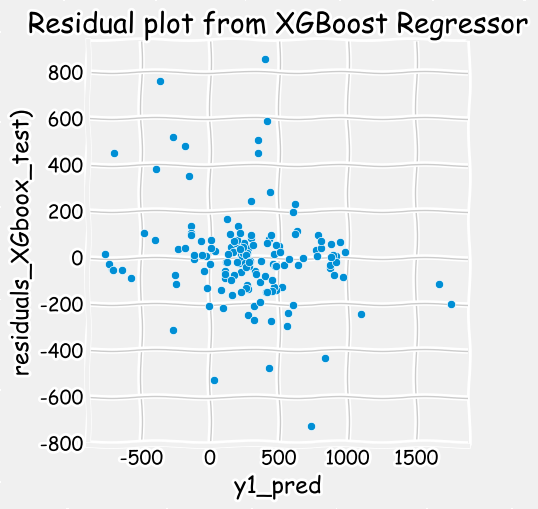

In [70]:
#sns.scatterplot(x=y3_ghat, y=residuals_XGboox, hue= X3_test)-- hue=X3_test["Fe"], size=y3_test, sizes=(40, 400), alpha=.5, palette="muted", height=6, data=residuals_XGboox)
sns.relplot(x=y1_pred, y=residuals_XGboox_test) #hue=X4_test, size=y4_test)
plt.xlabel('y1_pred')
plt.ylabel('residuals_XGboox_test)')
plt.title('Residual plot from XGBoost Regressor')
plt.show();

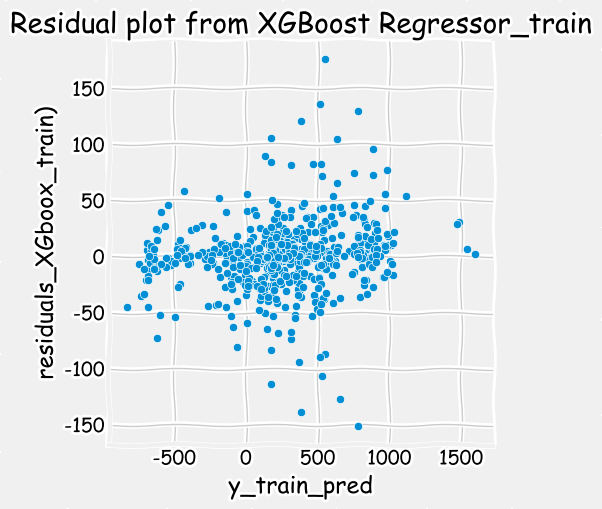

In [71]:
sns.relplot(x=y_train_pred, y=residuals_XGboox_train) 
plt.xlabel('y_train_pred')
plt.ylabel('residuals_XGboox_train)')
plt.title('Residual plot from XGBoost Regressor_train')
plt.show();

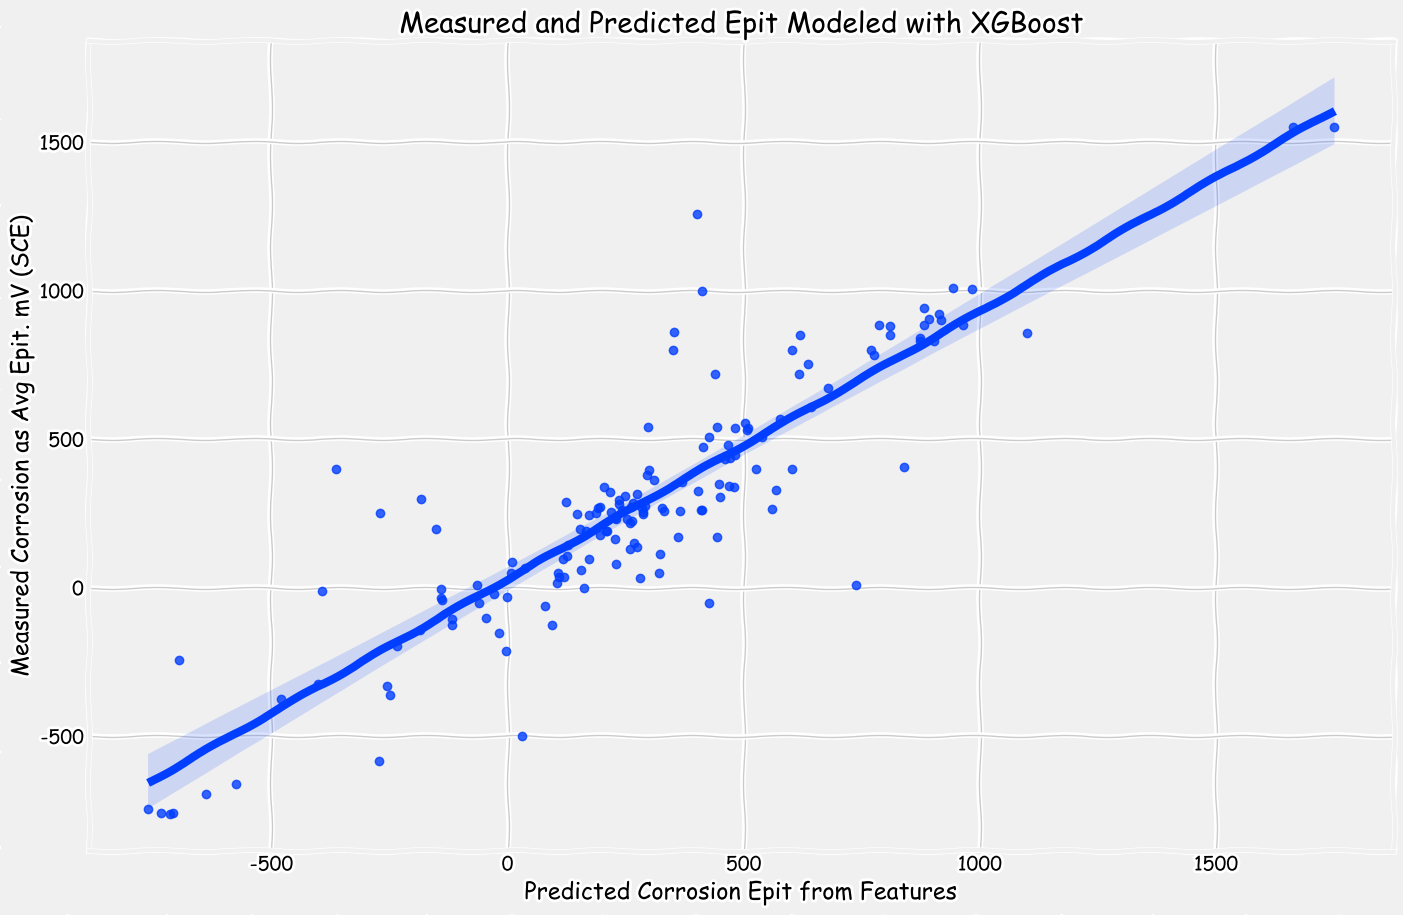

In [72]:
## Measured vs predicted with XGboox
#Adding a fittet regression line and another line :y1_train,  y1_train_pred'
sns.regplot(x=y1_pred, y=y_test, color='b')#, hue=X_test)
plt.xlabel('Predicted Corrosion Epit from Features')
plt.ylabel('Measured Corrosion as Avg Epit. mV (SCE)')
plt.title('Measured and Predicted Epit Modeled with XGBoost');

In [ ]:
X1_test_preprocessed.columns=['Cl', 'Test_Temp', 'pH', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'Nb', 'C', 'Si', 'Mn', 'Al', 'V', 'Ta','Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd', 'M_Al', 'M_Fe', 'M_HEA', 'M_NiCrMo', 'M_Other']
#suppose to be same as Alloys with whole element composition plus the 

## Hyperparameter Tuning
GridSearchCV

https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

In [ ]:
#what parameters does XGBoost have?
xgb.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [ ]:
xgb_params = {'n_estimators': [150, 200, 300],
                'learning_rate': [0.05, 0.1, 2],
                'colsample_bylevel': [0.5, 2, 5],
                'max_leaves': [0, 5, 20],
                'eta': [0.1, 0.5, 2],
                'min_child_weight': [2, 5, 10] }# 'objective': ['reg: linear', ]'learning_rate':[1, 2, 5]


grid_gs = GridSearchCV(XGBRegressor(seed=42), xgb_params, scoring=('neg_root_mean_squared_error'),
                  cv=5,  verbose=0, n_jobs=-1)

grid_gs.fit(X1_train_preprocessed, y_train)

/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizamandawatts/neufische/Corrosion_85_prediction/.venv/lib/python3.9/site-packages/xgboost/core.py", line 575, in inner_f
    return f(**kwargs)
  File "/Users/beatrizamandawatts/neuf

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [ ]:
# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
grid_gs.fit(X1_train_preprocessed, y_train)
end = timer()
grid_gs_time = end-start

In [ ]:
# Best score
print('Best score:', round(grid_gs.best_score_, 3))

# Best parameters
print('Best parameters:', grid_gs.best_params_)

Best score: -221.9
Best parameters: {'colsample_bylevel': 0.5, 'eta': 0.1, 'learning_rate': 0.05, 'max_leaves': 0, 'min_child_weight': 10, 'n_estimators': 300}


In [ ]:
# we will do this at least twice.. according to DRY we should write a function
def print_pretty_summary(grid_gs, xgb, y_test, y1_pred):
    print(grid_gs)
    print('=======================')
    print('n_estimators: {}'.format(xgb.n_estimators))
    print('learning_rate: {}'.format(xgb.learning_rate))
    print('max_leaves: {}'.format(xgb.max_leaves))
    print('min_child_weight: {}'.format(xgb.min_child_weight))
    print("MAE: {:2f}".format(mean_absolute_error(y_test, y1_pred).round(3)))
    print("RMSE: {:2f}".format(mean_squared_error(y_test, y1_pred, squared=False).round(3)))
    print("R2: {:2f}".format(r2_score(y_test, y1_pred).round(3)))
    print("MAE: {:2f}".format(mean_absolute_error(y_train , y1_train_pred).round(3)))
    print("RMSE: {:2f}".format(mean_squared_error(y_train , y1_train_pred, squared=False).round(3)))
    print("R2: {:2f}".format(r2_score(y_train , y1_train_pred).round(3)))

In [ ]:
print_pretty_summary(xgb, xgb, y_test, y1_pred)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
n_estimators: 100
learning_rate: None
max_leaves: None
min_child_weight: None
MAE: 120.140000
RMSE: 193.005000
R2: 0.788000
MAE: 17.331000
RMSE: 26.743000
R2: 0.996000
